In [11]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import random

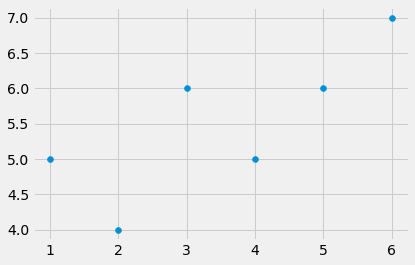

In [12]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

plt.scatter(xs,ys)
plt.show()

In [13]:
def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+= step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [ i for i in range(hm)]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

In [98]:
xs, ys = create_dataset(80, 5, 2, correlation='pos')

In [99]:
def best_fit_slope_and_Yintercept(xs, ys):
    m = (( mean(xs)*mean(ys) - mean(xs*ys) )
        /( mean(xs)**2 - mean(xs**2)) )
    b = mean(ys) - m*mean(xs)
    return m, b

In [100]:
def squared_error(ys_ori, ys_line):
    return sum((ys_line - ys_ori)**2)
    
def coefficient_of_determination(ys_ori, ys_line):
    y_mean_line = [ mean(ys_ori) for y in ys_ori]
    squared_error_regr = squared_error(ys_ori, ys_line)
    squared_error_y_mean = squared_error(ys_ori, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

In [101]:
m, b = best_fit_slope_and_Yintercept(xs,ys)
print(m, b)

regression_line = [ (m*x)+b for x in xs]

1.9919362400375056 0.9435185185185304


In [102]:
r_squared = coefficient_of_determination(ys, regression_line)
r_squared

0.9965266257209507

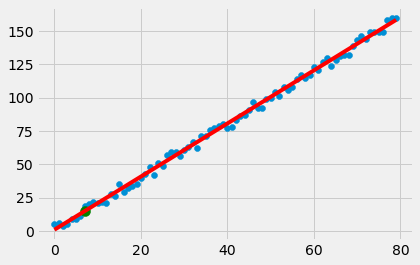

In [103]:
plt.scatter(xs, ys)
plt.plot(xs, regression_line, color = 'red')
p_x = 7
plt.scatter(p_x, (m*p_x)+b, s=100, color = 'green')
plt.show()